# Analytic Vidya - Black Friday 

A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.
Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

## Data Description

| Variable                   | Definition                                          |
|----------------------------|-----------------------------------------------------|
| User_ID                    | User ID                                             |
| Product_ID                 | Product ID                                          |
| Gender                     | Sex of User                                         |
| Age                        | Age in bins                                         |
| Occupation                 | Occupation (Masked)                                 |
| City_Category              | Category of the City (A,B,C)                        |
| Stay_In_Current_City_Years | Number of years stay in current city                |
| Marital_Status             | Marital Status                                      |
| Product_Category_1         | Product Category (Masked)                           |
| Product_Category_2         | Product may belongs to other category also (Masked) |
| Product_Category_3         | Product may belongs to other category also (Masked) |
| Purchase                   | Purchase Amount (Target Variable)                   |

## Exploration

This phase is important as one needs to become familiar with the data content.

In [1]:
import pandas as pd

In [2]:
# training data only, test data is also available but not labeled
filename = './train_oSwQCTC/train.csv'
df = pd.read_csv(filename)

In [3]:
# Take a peak at the data
# All features are masked or categorical
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
# Missing data in Product_Category_2 and Product_Category_3
# All other features have no missing data
df.count()

User_ID                       550068
Product_ID                    550068
Gender                        550068
Age                           550068
Occupation                    550068
City_Category                 550068
Stay_In_Current_City_Years    550068
Marital_Status                550068
Product_Category_1            550068
Product_Category_2            376430
Product_Category_3            166821
Purchase                      550068
dtype: int64

### Target: Purchase

Distribution of Purchase Amount

<IPython.core.display.Javascript object>


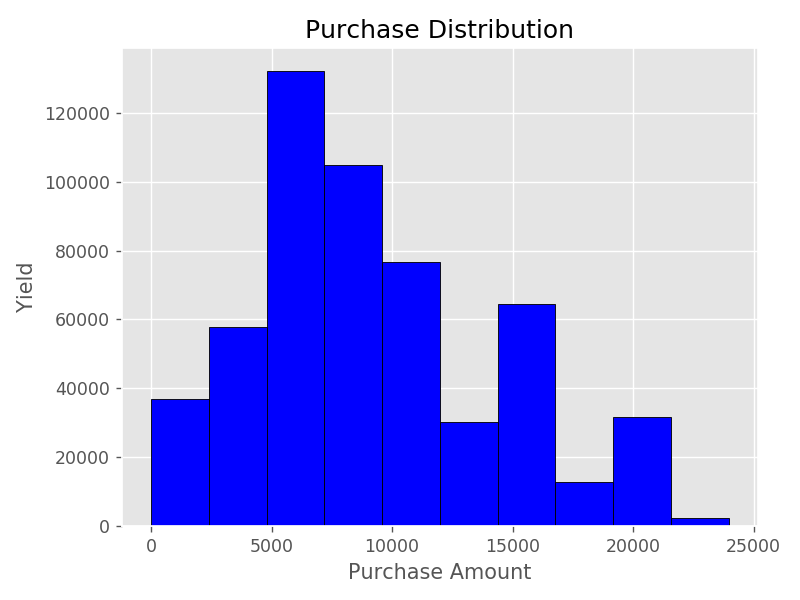

In [5]:
# keep matplotlib interactive
%matplotlib notebook
import matplotlib.pyplot as plt
# use ggplot style
plt.style.use('ggplot')
# Plot distribution of purchases
_ , axPur = plt.subplots()
df.Purchase.hist(color='b', edgecolor ='k', ax=axPur)
# add title and axes labels
axPur.set_title('Purchase Distribution')
axPur.set_xlabel('Purchase Amount')
axPur.set_ylabel('Yield')
plt.tight_layout()

Average purchase amount per user

<IPython.core.display.Javascript object>


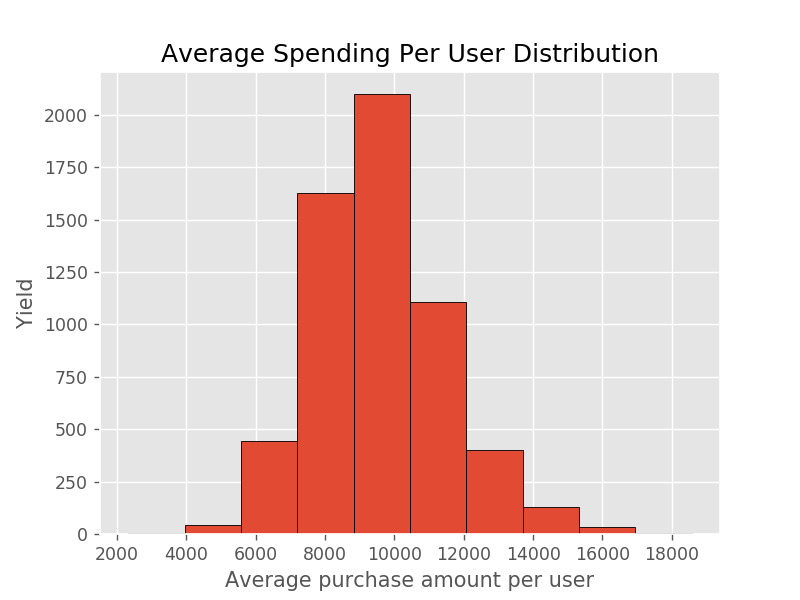

Text(0,0.5,'Yield')

In [6]:
_ , axUID = plt.subplots()
# What is the average purchase amount per user?
df.groupby(['User_ID']).Purchase.mean().hist(ax=axUID, edgecolor ='k')
# add title and axes labels
axUID.set_title('Average Spending Per User Distribution')
axUID.set_xlabel('Average purchase amount per user')
axUID.set_ylabel('Yield')

Does each product ID have the same price? Any discount or mark-up?

<IPython.core.display.Javascript object>


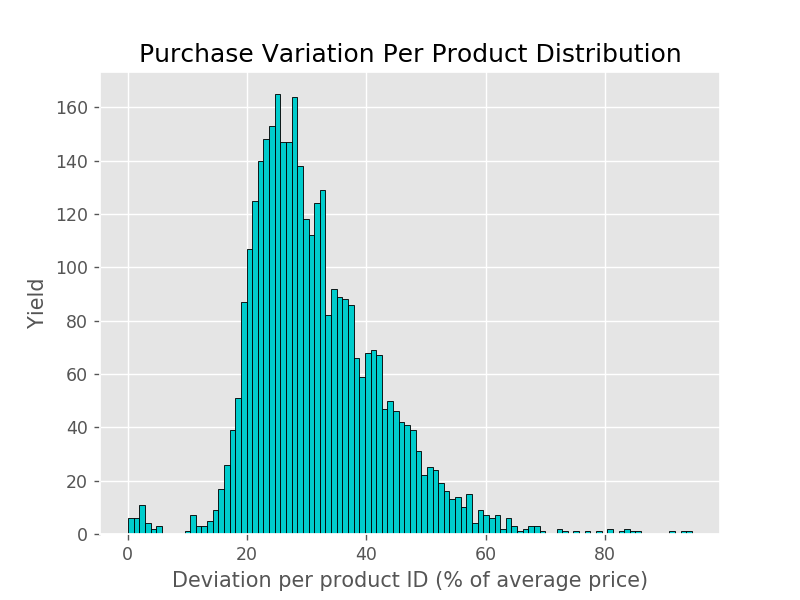

Text(0,0.5,'Yield')

In [7]:
_ , axpidpur = plt.subplots()
# Variaton in price for the same product
Prod_purchase = df.groupby(['Product_ID']).Purchase
(Prod_purchase.std()/Prod_purchase.mean()*100).hist(ax=axpidpur, edgecolor ='k', color=[0, 0.8, 0.8], bins = 100)
# add title and axes labels
axpidpur.set_title('Purchase Variation Per Product Distribution')
axpidpur.set_xlabel('Deviation per product ID (% of average price)')
axpidpur.set_ylabel('Yield')

There is a little agglomeration at less than 6%. Most Product price vary by 25%.

### User ID

How many users?

In [8]:
UserID_distrib = df.User_ID.value_counts()
UserID_distrib.count()

5891

What is the distribution of instances per user? <br>
Note there is a minimum of 6 instances per user.<br>
There is a peak around 16 instances/user.

In [9]:
UserID_distrib.describe()

count    5891.000000
mean       93.374300
std       107.190049
min         6.000000
25%        26.000000
50%        54.000000
75%       117.000000
max      1026.000000
Name: User_ID, dtype: float64

<IPython.core.display.Javascript object>


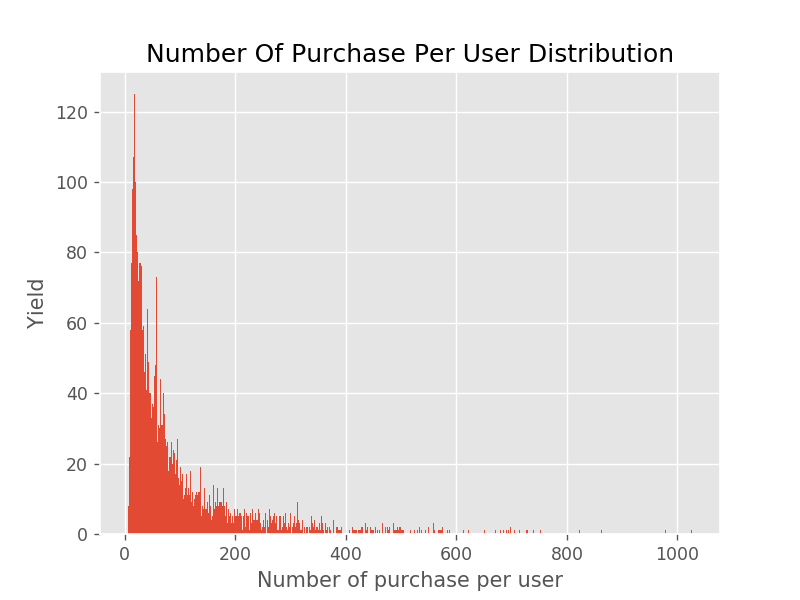

Text(0,0.5,'Yield')

In [10]:
_ , axUIDCnt = plt.subplots()
UserID_distrib.hist(bins=1000, ax=axUIDCnt)
# add title and axes labels
axUIDCnt.set_title('Number Of Purchase Per User Distribution')
axUIDCnt.set_xlabel('Number of purchase per user')
axUIDCnt.set_ylabel('Yield')

In [11]:
# Number of User ID that occurs less than 10 times
UserID_distrib[UserID_distrib < 10].count()

40

## Product ID

How many unique product?

In [12]:
ProdID_distrib = df.Product_ID.value_counts()
ProdID_distrib.count()

3631

Distribution of Product ID

In [13]:
ProdID_distrib.describe()

count    3631.000000
mean      151.492151
std       212.852932
min         1.000000
25%        19.500000
50%        71.000000
75%       194.000000
max      1880.000000
Name: Product_ID, dtype: float64

<IPython.core.display.Javascript object>


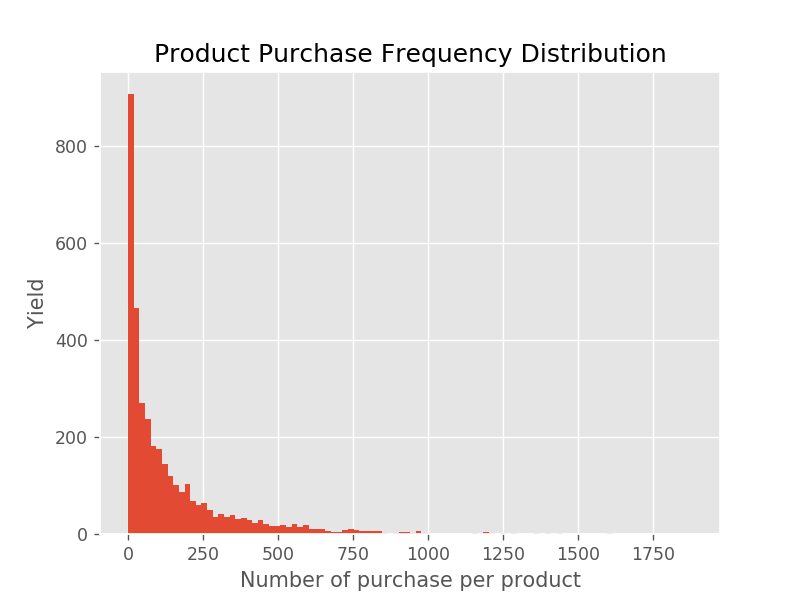

Text(0,0.5,'Yield')

In [14]:
# distribution of Product ID instance
_ , axPID = plt.subplots()
ProdID_distrib = df.Product_ID.value_counts()
ProdID_distrib.hist(ax=axPID, bins=100)
# add title and axes labels
axPID.set_title('Product Purchase Frequency Distribution')
axPID.set_xlabel('Number of purchase per product')
axPID.set_ylabel('Yield')

In [15]:
# Number of product ID that occurs once only
ProdID_distrib[ProdID_distrib == 1].count()

144

In [16]:
# Number of product ID that occurs less than 10 times
ProdID_distrib[ProdID_distrib < 10].count()

560

144 products have only one instance (purchased once only)<br>
560 products have less than 10 instances.<br>

## Gender

There are only Male or Female in this dataset.

In [17]:
# how many different gender types?
Gender_distrib = df.Gender.value_counts(normalize = True)
Gender_distrib

M    0.753105
F    0.246895
Name: Gender, dtype: float64

Plot distribution of gender

<IPython.core.display.Javascript object>


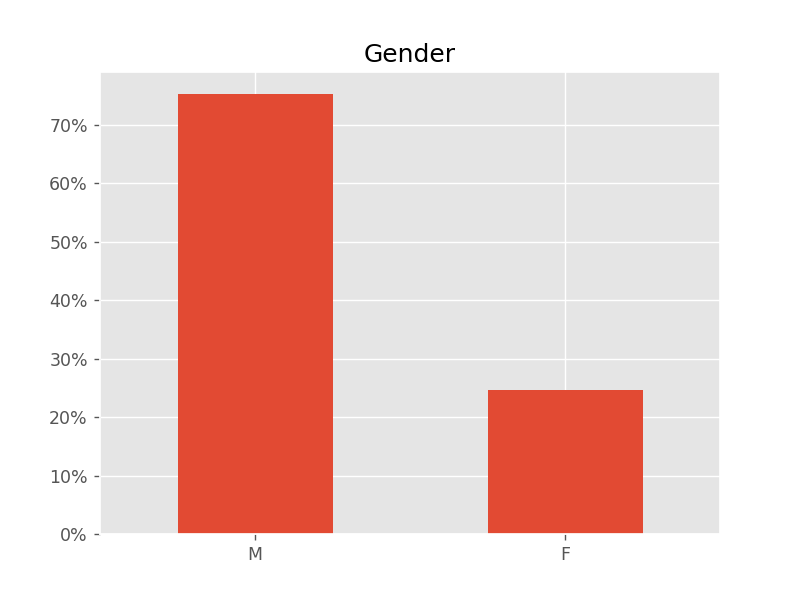

In [18]:
# make a function of all subsequent categorical features
def make_plot_bar_norm(distrib):
    _ , axg = plt.subplots()
    (distrib*100).plot(kind = 'bar',ax=axg)
    # add title
    axg.set_title(distrib.name)
    # add percent on y axis labels
    axg.set_yticklabels([ '{:.0f}%'.format(l)  for l in axg.get_yticks()])
    # reset x axis label to 0 rotation
    axg.tick_params(axis = 'x', rotation = 0)
    
make_plot_bar_norm(Gender_distrib)

## Age
Provided as intervals.

In [19]:
# how many different age categories?
df.Age.value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

Convert age column to categorical type (as defined by pandas) so that we can set the age category order. This is an object type by default so it doesn't know that '46-50' is a higher age interval than '0-17' for instances.

In [20]:
# prevent error if this is ran again
if not pd.core.common.is_categorical(df.Age):
    # get age categories and order it, sort_values() does the job (sort alphanumeric characters 0-9 then A-Z then a-z)
    age_cat = df.Age.value_counts().index.sort_values()
    # change age data type in that order
    df.Age = df.Age.astype('category', categories=age_cat, ordered=True)
# check columns types
df.dtypes

# NOTE: if age was not converted to a category type, an alternative to plot age distribution in age order would be:
# age_distrib = df.Age.value_counts(normalize = True).sort_index()

User_ID                          int64
Product_ID                      object
Gender                          object
Age                           category
Occupation                       int64
City_Category                   object
Stay_In_Current_City_Years      object
Marital_Status                   int64
Product_Category_1               int64
Product_Category_2             float64
Product_Category_3             float64
Purchase                         int64
dtype: object

Distribution of age categories

<IPython.core.display.Javascript object>


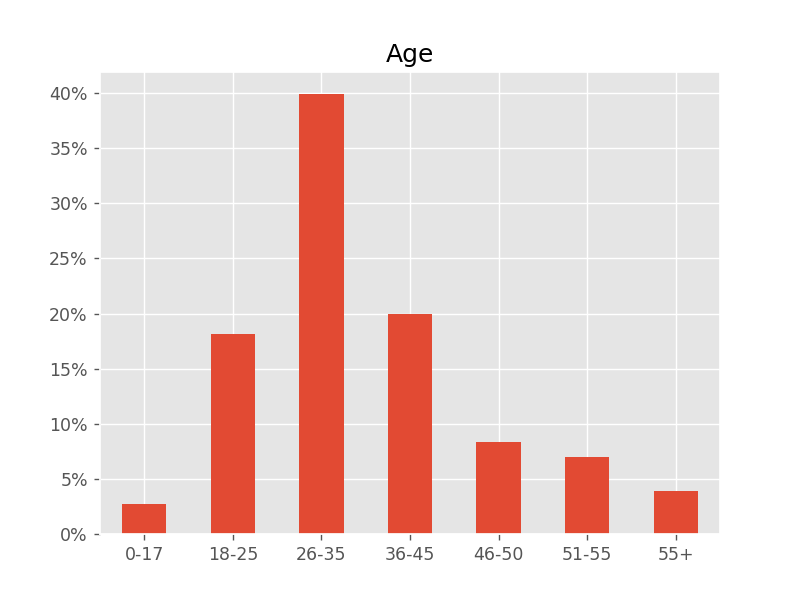

In [21]:
age_distrib = df.Age.value_counts(normalize = True, sort = False)
make_plot_bar_norm(age_distrib)

## Occupation
Occupation are masked. In other words they are already encoded. There are 21 different occupation encoded from 0 to 20 included.

Distribution of Occupation

<IPython.core.display.Javascript object>


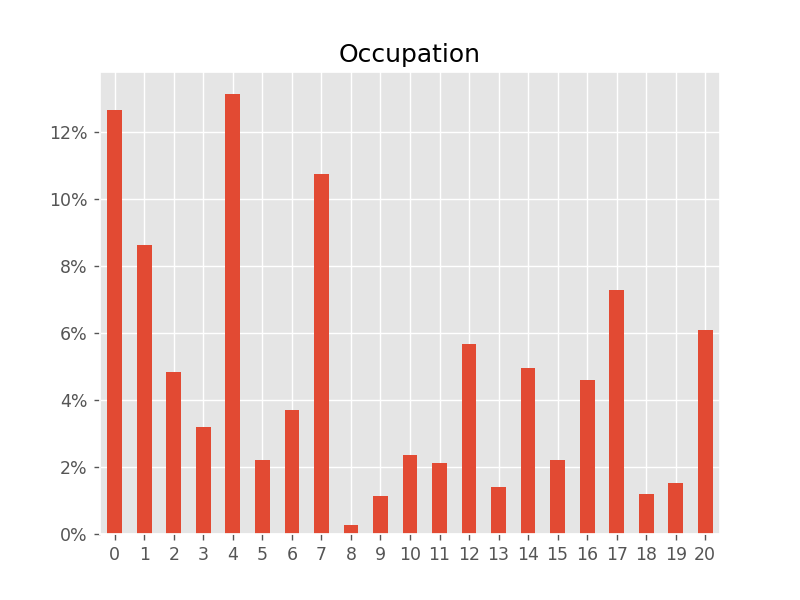

In [22]:
# Normalized frequency count and order it by occupation (using index in ascending order)
occ_distrib = df.Occupation.value_counts(normalize = True).sort_index()
make_plot_bar_norm(occ_distrib)

## City categories
There are 3 city categories: A, B and C. Below is how there are distributed:

<IPython.core.display.Javascript object>


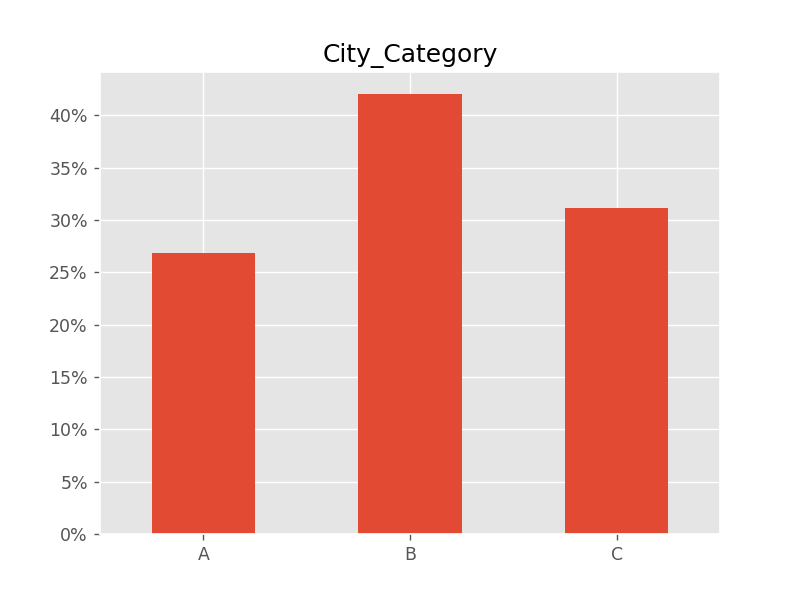

In [23]:
# Normalized frequency count and order it by City (using index in ascending order)
city_distrib = df.City_Category.value_counts(normalize = True).sort_index()
make_plot_bar_norm(city_distrib)

## Number of year in current city
It ranges from 0 to 3 years. At 4 years and over, it is labeled as '4+'.


<IPython.core.display.Javascript object>


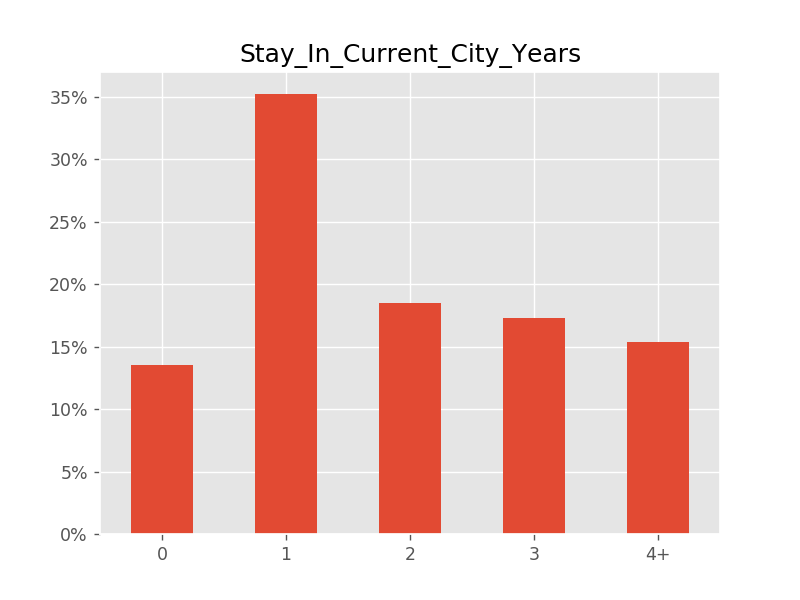

In [24]:
# Normalized frequency count and order it by years (using index in ascending order)
stay_distrib = df.Stay_In_Current_City_Years.value_counts(normalize = True).sort_index()
make_plot_bar_norm(stay_distrib)

## Marital status
Marital status is 0 or 1. Either you're married or you're not!

<IPython.core.display.Javascript object>


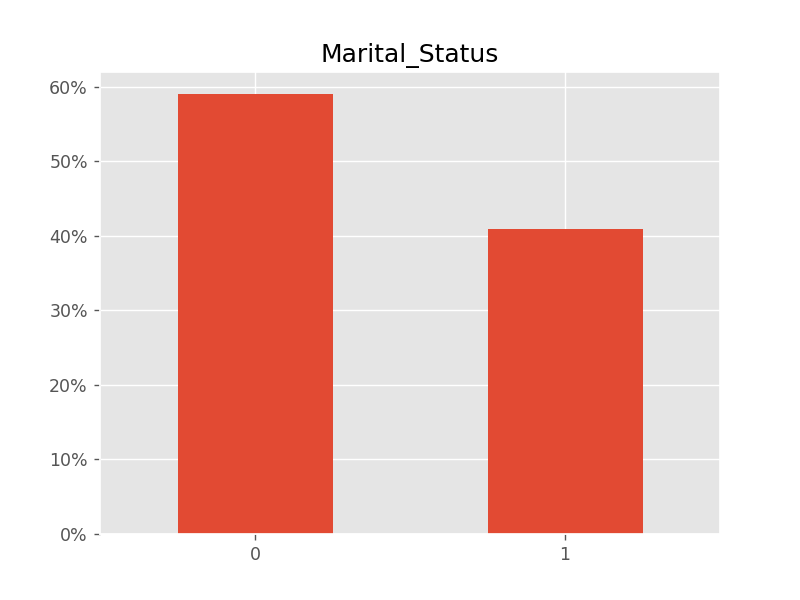

In [25]:
# Normalized frequency count and order it by marital status (using index in ascending order)
mar_distrib = df.Marital_Status.value_counts(normalize = True).sort_index()
make_plot_bar_norm(mar_distrib)

## Product Categories

Product Categories are masked (encoded numerically).

Product Category 1 has 20 product categories (1 to 20). <br>
Product Category 2 has 17 product categories (2.0 to 18.0). <br>
Product Category 3 has 15 product categories (3.0 to 18.0, missing 7.0).<br>

NOTE: Product Category 2 and 3 are float because there are some nan values. (And nan values are float by definition)

PS: On the bar plot below, I reformatted x labels to integer for Product Category 2 and 3.

<IPython.core.display.Javascript object>


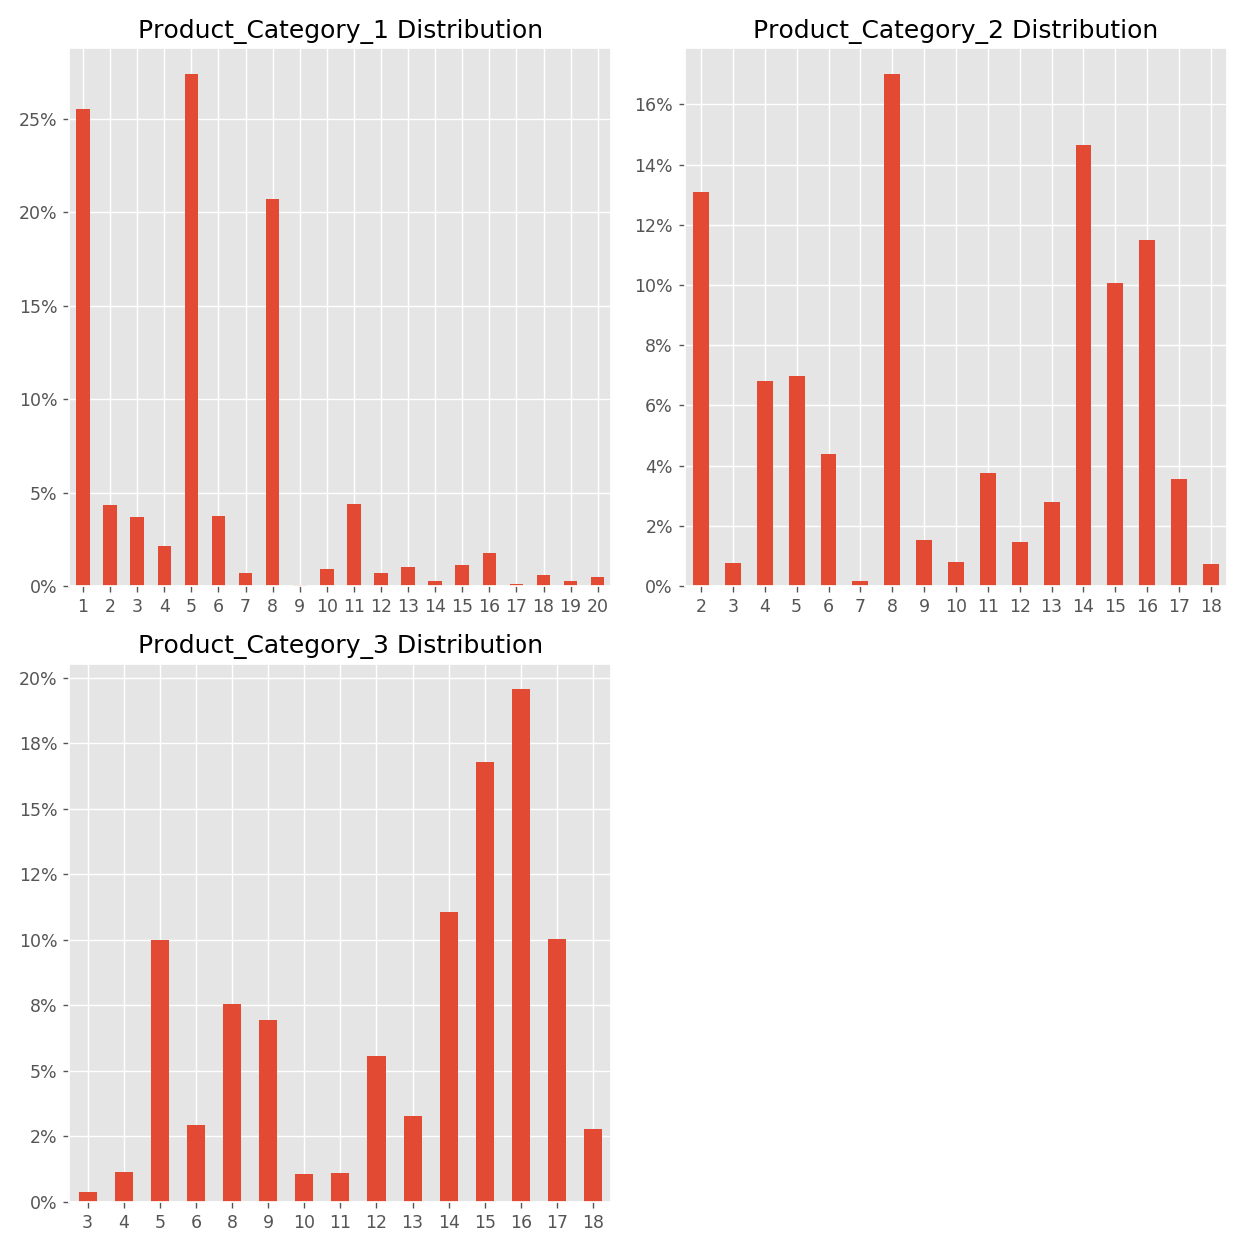

In [26]:
# Make plots for each product categories
pcat_list = ['Product_Category_1', 'Product_Category_2', 'Product_Category_3']
_ , axwpc = plt.subplots(2, 2, figsize=(10,10))
axwpc = axwpc.flatten()
for k, colname in enumerate(pcat_list):
    dis = df.loc[:, colname]
    (dis.value_counts(normalize = True).sort_index()*100).plot(kind='bar', ax=axwpc[k])
    # add title
    axwpc[k].set_title(dis.name + ' Distribution')
    # add percent on y axis labels, uses numerical value of each tick (just in case scale has changed)
    axwpc[k].set_yticklabels([ '{:.0f}%'.format(l)  for l in axwpc[k].get_yticks()])
    # set x ticklabels to integer, reformat existing labels (categories must be treated as string here)
    axwpc[k].set_xticklabels([ '{:.0f}'.format(float(l.get_text()))  for l in axwpc[k].get_xticklabels()])
    # reset x axis label to 0 rotation
    axwpc[k].tick_params(axis = 'x', rotation = 0)
axwpc[-1].set_visible(False)
plt.tight_layout()